In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import matplotlib.pylab as plt
import seaborn as sns

2024-03-07 23:18:10.125269: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-07 23:18:10.587829: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-07 23:18:10.591101: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-07 23:18:13.803327: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
data = pd.read_csv('data/GOOG.csv').set_index('Date')
data = data.drop(['Adj Close','Volume','High','Low','Open'], axis= 1)
data['Returns[%]'] = (np.log(data['Close']) - np.log(data['Close'].shift(1))) * 100
data = data.dropna()
  # Function to calculate squared deviations from average return within a window
def squared_deviations(window_data):
    average_return = window_data.mean()
    return ((window_data - average_return)**2).mean()

windows = [10,15,20]
for i in windows:
    data[f'Rv_{i}'] = data['Returns[%]'].rolling(window= i).apply(squared_deviations).shift(-(i-1))
data.head()

,Close,Returns[%],Rv_10,Rv_15,Rv_20
Date,,,,,
2014-02-05,28.473274,0.441838,0.613933,0.456266,0.504845
2014-02-06,28.890711,1.455422,0.628042,0.474654,0.506682
2014-02-07,29.326078,1.495705,0.548184,0.425570,0.459933
2014-02-10,29.213751,-0.383765,0.427986,0.430738,0.384515
2014-02-11,29.643389,1.459961,0.382514,0.454102,0.430674


In [10]:
data.describe()

,Close,Returns[%],Rv_10,Rv_15,Rv_20
count,2516.000000,2516.000000,2507.000000,2502.000000,2497.000000
mean,70.110941,0.064470,2.835056,2.926262,2.972402
std,37.791500,1.758127,3.765310,3.453358,3.224251
min,24.560070,-11.766725,0.044236,0.067998,0.080841
25%,38.115499,-0.712886,0.868681,0.998130,1.086128
50%,57.540749,0.084532,1.647343,1.848489,1.986548
75%,102.174503,0.923336,3.279695,3.557040,3.777856
max,154.839996,14.887184,40.737450,34.426843,29.672392


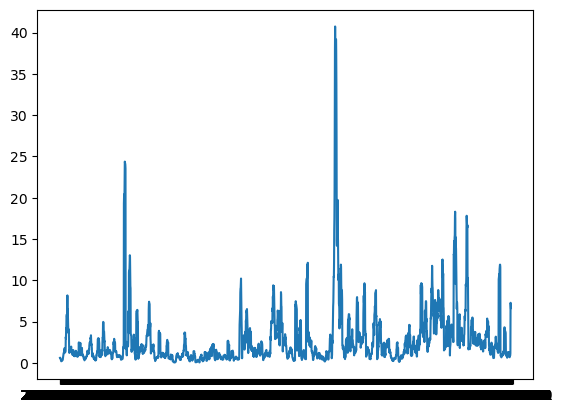

In [24]:
plt.plot(data['Rv_10'])